In [1]:
import os
import pandas as pd
from newsapi import NewsApiClient
from ast import literal_eval
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles
bitcoin_news=newsapi.get_everything(q='Bitcoin',language='en',page_size=100)
bitcoin_news['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum_news=newsapi.get_everything(q='Ethereum',language='en',page_size=100)
ethereum_news['articles'][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Miller Kern',
 'title': 'Debunking Blockchain once and for all',
 'description': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20. When it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top …",
 'url': 'https://mashable.com/shopping/oct-20-blockchain-and-ethereum-programmer-online-courses/',
 'urlToImage': 'https://mondrian.mashable.com/2019%252F10%252F20%252F20%252Fd451f6dc63634e7ebc1a6884f0de511f.0108b.jpg%252F1200x630.jpg?signature=wXr1QUIZY8rWVXkvW6qxTgQk24E=',
 'publishedAt': '2019-10-20T09:00:00Z',
 'content': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… 

In [7]:
def generate_sentiments(articles):
    sentiments=[]
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu

            })
        except AttributeError:
            pass
                
    return sentiments

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=pd.DataFrame(generate_sentiments(bitcoin_news['articles']))
cols = ['Compound','Negative','Neutral','Positive','Text']
bitcoin_sentiments = bitcoin_sentiments[cols]

bitcoin_sentiments.head()


,Compound,Negative,Neutral,Positive,Text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...


In [9]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments=pd.DataFrame(generate_sentiments(ethereum_news['articles']))
cols = ['Compound','Negative','Neutral','Positive','Text']
ethereum_sentiments = ethereum_sentiments[cols]

ethereum_sentiments.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.144200,0.039398,0.900061,0.060561
std,0.437824,0.054791,0.075762,0.053277
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.096325,0.000000,0.857750,0.000000
50%,0.175200,0.000000,0.927000,0.065500
75%,0.507000,0.067500,0.946500,0.085250
max,0.914100,0.271000,1.000000,0.249000


In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiments.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.178518,0.026906,0.916385,0.056698
std,0.410332,0.048792,0.072458,0.055863
min,-0.877900,0.000000,0.551000,0.000000
25%,0.000000,0.000000,0.889500,0.000000
50%,0.250000,0.000000,0.930000,0.057000
75%,0.502100,0.045250,0.958000,0.098500
max,0.822100,0.287000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    lemmatizer = WordNetLemmatizer()
    sentence_clean=regex.sub('', text)
    words=word_tokenize(sentence_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw = set(stopwords.words('english'))
    sw_addon = {'(',')',',','.','[',']',':',':'}
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return output


In [15]:
# Create a new tokens column for bitcoin
bitcoin_sentiments['Tokens']=[tokenizer(r) for r in bitcoin_sentiments['Text']]
bitcoin_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
...,...,...,...,...,...,...
93,0.0000,0.000,1.000,0.000,Bitcoin prices have quietly been in meltdown m...,"[bitcoin, price, quietly, meltdown, mode, rece..."
94,0.1531,0.037,0.911,0.051,Illustration by Stephen Shankland/CNET\r\nAfte...,"[illustration, stephen, shanklandcnetafter, fo..."
95,0.2023,0.047,0.887,0.067,After seeing its IPO dreams slashed earlier th...,"[seeing, ipo, dream, slashed, earlier, year, b..."
96,-0.7140,0.184,0.736,0.080,"I hate to be the bearer of bad news, but victi...","[hate, bearer, bad, news, victim, lost, money,..."


In [16]:
# Create a new tokens column for ethereum
ethereum_sentiments['Tokens']=[tokenizer(r) for r in ethereum_sentiments['Text']]
ethereum_sentiments

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti..."
...,...,...,...,...,...,...
91,-0.5423,0.106,0.894,0.000,A Spanish financial watchdog has issued a warn...,"[spanish, financial, watchdog, ha, issued, war..."
92,0.3818,0.000,0.936,0.064,Noelle Acheson is a veteran of company analysi...,"[noelle, acheson, veteran, company, analysis, ..."
93,0.0000,0.000,1.000,0.000,"Bitski, a developer-focused blockchain wallet ...","[bitski, developerfocused, blockchain, wallet,..."
94,0.8221,0.000,0.798,0.202,"Ethereum co-founder and founder of Consensys, ...","[ethereum, cofounder, founder, consensys, jose..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [22]:
def bigram_counter(tokens):
    
    top_10 = dict(Counter(ngrams(tokens, n=2)))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [34]:
# Generate the Bitcoin N-grams where N=2
all_bitcoin_tokens = []
for x in range(0,len(bitcoin_sentiments)):
    for y in bitcoin_sentiments['Tokens'][x]:
        all_bitcoin_tokens.append(y)
bigram_counter(all_bitcoin_tokens)

,bigram,count
0,"(less, two)",1
1,"(two, mile)",1
2,"(mile, icelands)",1
3,"(icelands, reykjavik)",1
4,"(reykjavik, airport)",1
...,...,...
2038,"(according, tuesday)",1
2039,"(tuesday, report)",1
2040,"(report, security)",1
2041,"(security, firm)",1


In [32]:
# Generate the Ethereum N-grams where N=2
all_eth_tokens = []
for x in range(0,len(ethereum_sentiments)):
    for y in ethereum_sentiments['Tokens'][x]:
        all_eth_tokens.append(y)
bigram_counter(all_eth_tokens)

,bigram,count
0,"(tldr, indepth)",1
1,"(indepth, complete)",1
2,"(complete, blockchain)",4
3,"(blockchain, ethereum)",3
4,"(ethereum, programmer)",4
...,...,...
2002,"(place, hong)",1
2003,"(hong, kong)",1
2004,"(kong, fintech)",1
2005,"(week, lubin)",1


In [33]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    bigrams = ngrams(tokens,n=1)
    top_10 = dict(Counter(bigrams).most_common(N))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
   

In [35]:
# Get the top 10 words for Bitcoin
bitcoin_10=token_count(all_bitcoin_tokens)
bitcoin_10

,bigram,count
0,"(bitcoin,)",99
1,"(char,)",97
2,"(satoshi,)",41
3,"(nakaboto,)",38
4,"(cryptocurrency,)",30
5,"(ha,)",29
6,"(btc,)",27
7,"(past,)",22
8,"(say,)",22
9,"(another,)",21


In [36]:
# Get the top 10 words for Ethereum
ethereum_10=token_count(all_eth_tokens)
ethereum_10

,bigram,count
0,"(char,)",96
1,"(ethereum,)",69
2,"(ha,)",31
3,"(bitcoin,)",27
4,"(blockchain,)",26
5,"(day,)",25
6,"(cryptocurrency,)",20
7,"(morning,)",16
8,"(week,)",14
9,"(price,)",14


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

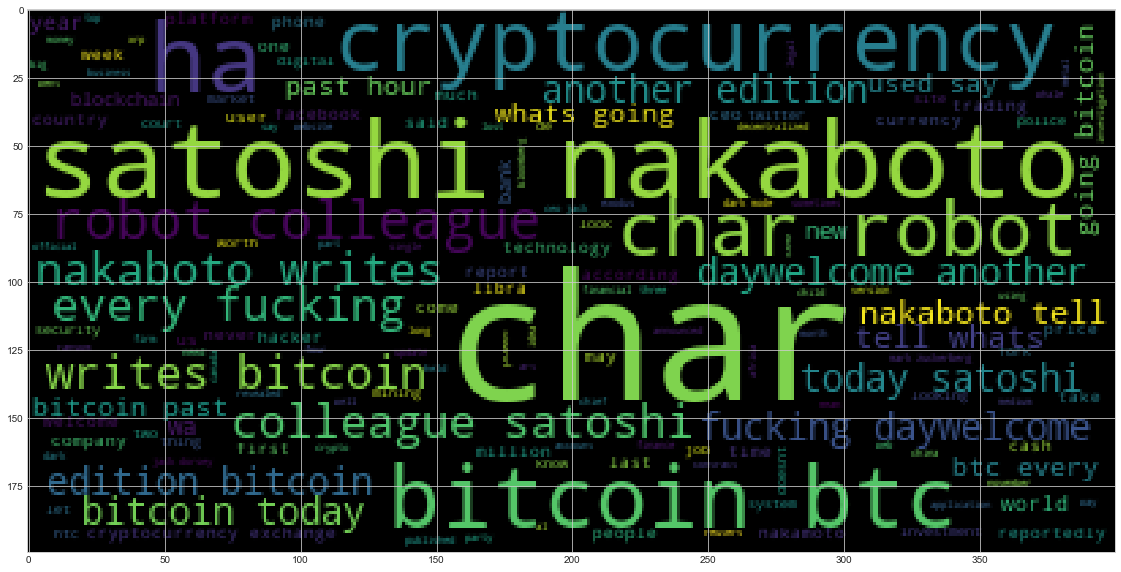

In [40]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(all_bitcoin_tokens))
plt.imshow(wc)

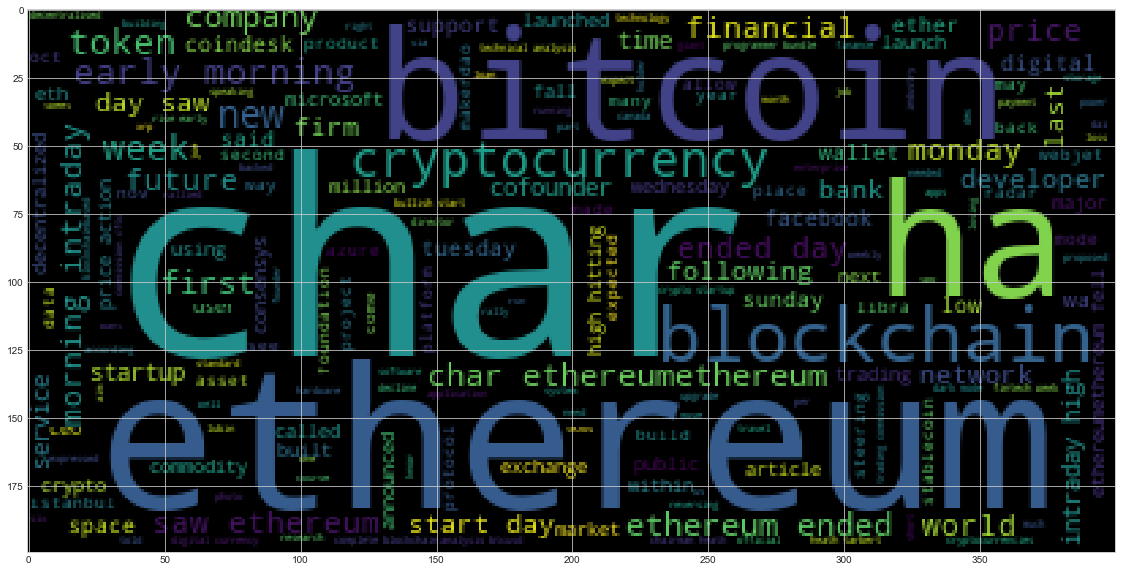

In [41]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(all_eth_tokens))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together

In [ ]:
# Run the NER processor on all of the text

# Add a title to the document

In [ ]:
# Render the visualization

In [ ]:
# List all Entities

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together

In [ ]:
# Run the NER processor on all of the text

# Add a title to the document

In [ ]:
# Render the visualization

# List all Entities